In [2]:
import torchvision

from EDFunctions import *

/data/marci/mjakowsk/miniconda3/envs/eds2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
trainset = torchvision.datasets.CIFAR10(root='./data/', train=True,
                                        download=True, transform=transforms.ToTensor())

testset = torchvision.datasets.CIFAR10(root='./data/', train=False,
                                        download=True, transform=transforms.ToTensor())

/data/marci/mjakowsk/miniconda3/envs/eds2/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


Files already downloaded and verified
Files already downloaded and verified


In [5]:
print(data.shape)

(50000, 32, 32, 3)


In [7]:
embeds = gen_2d_embeddings(data)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000


In [ ]:
import numpy as np
#np.save("CIFAR10_2d_embeddings.npy", embeds)

In [3]:
embeds = np.load("CIFAR10_train_2d_embeddings.npy")

In [5]:
print(embeds.shape)

(50000, 2)


In [12]:

labels = np.array(range(0, 10))
targets = trainset.targets

quantiles = get_all_quantiles(embeds, targets, labels, 0.73, "inside", True)
print(quantiles.shape)

(50000,)


[   10    20    21 ... 49994 49995 49999]


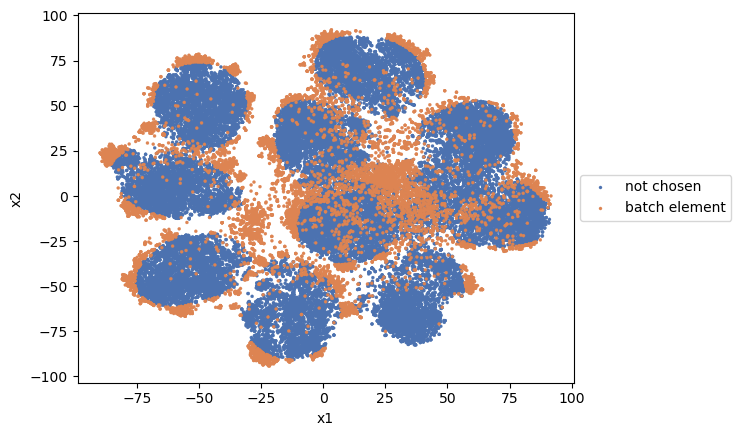

In [14]:

mask = quantiles > 0.8
all_indexes = np.arange(0, len(targets))
selected_indexes = (all_indexes[mask])
print((selected_indexes))
fig = plot_batch_elements(embeds, selected_indexes, tick_size=5)

In [15]:
np.save("CIFAR10_train_quantiles.npy", quantiles)